## Importing the Dependencies

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

## Data Collection and Processing

In [ ]:
# loading the csv data to a Pandas DataFrame
heart_data = pd.read_csv('/content/heart_disease_data.csv')

In [ ]:
# print last 5 rows of the dataset
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
# number of rows and columns in the dataset
heart_data.shape

(303, 14)

In [ ]:
# getting some info about the data
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
# checking for missing values
heart_data.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
# statistical measures about the data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# checking the distribution of Target Variable
heart_data['target'].value_counts()

,count
target,
1,165
0,138


## 1 --> Defective Heart
## 0 --> Healthy Heart



## Splitting the Features and Target

In [ ]:
X = heart_data.drop(columns='target', axis=1)
Y = heart_data['target']

In [ ]:
print(X)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2        2   0    

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(303, 13) (242, 13) (61, 13)


## Model Training

## Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000)

In [ ]:
# training the LogisticRegression model with Training data
model.fit(X_train, Y_train)

LogisticRegression(max_iter=1000)

## Model Evaluation

In [ ]:
# Ensure the model is fitted before making predictions
model.fit(X_train, Y_train)

# accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

## Accuracy Score

In [ ]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.8553719008264463


In [ ]:
# accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [ ]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8032786885245902


## Building a Predictive System

In [ ]:
input_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)

# change the input data to a numpy array
input_data_as_numpy_array= np.asarray(input_data)

# reshape the numpy array as we are predicting for only on instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]== 0):
  print('The Person does not have a Heart Disease')
else:
  print('The Person has Heart Disease')

[0]
The Person does not have a Heart Disease


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


## Visualization

Import Tools

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


1. Load Data


In [ ]:
# Make target more readable (optional)
df["target_label"] = df["target"].map({0: "No Heart Disease", 1: "Heart Disease"})

sns.set(style="whitegrid", context="talk")
plt.rcParams["figure.figsize"] = (10, 6)

2. Class balance: target

/tmp/ipython-input-394025400.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target_label", data=df, palette="Set2")


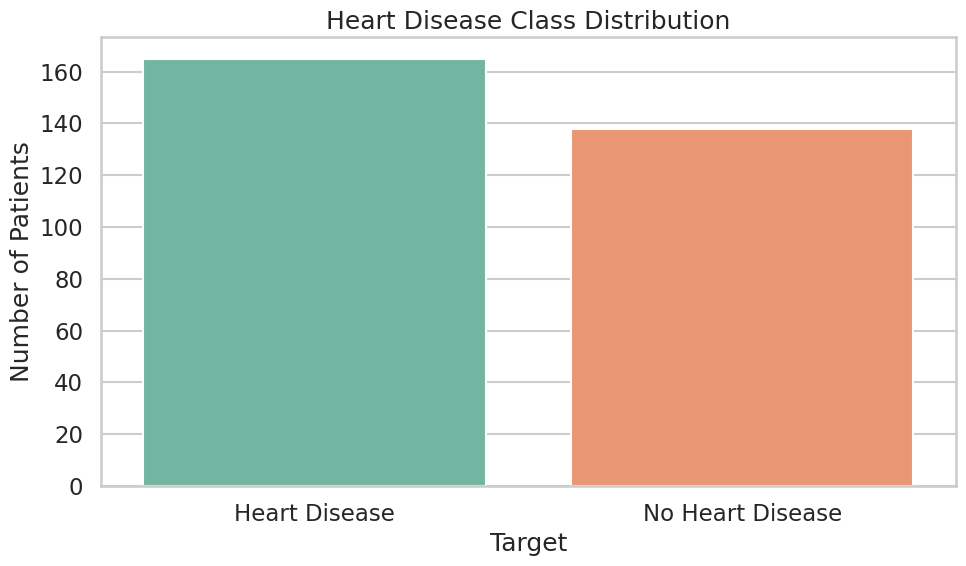

In [ ]:
plt.figure()
sns.countplot(x="target_label", data=df, palette="Set2")
plt.title("Heart Disease Class Distribution")
plt.xlabel("Target")
plt.ylabel("Number of Patients")
plt.tight_layout()
plt.show()


3. Age vs Heart Disease

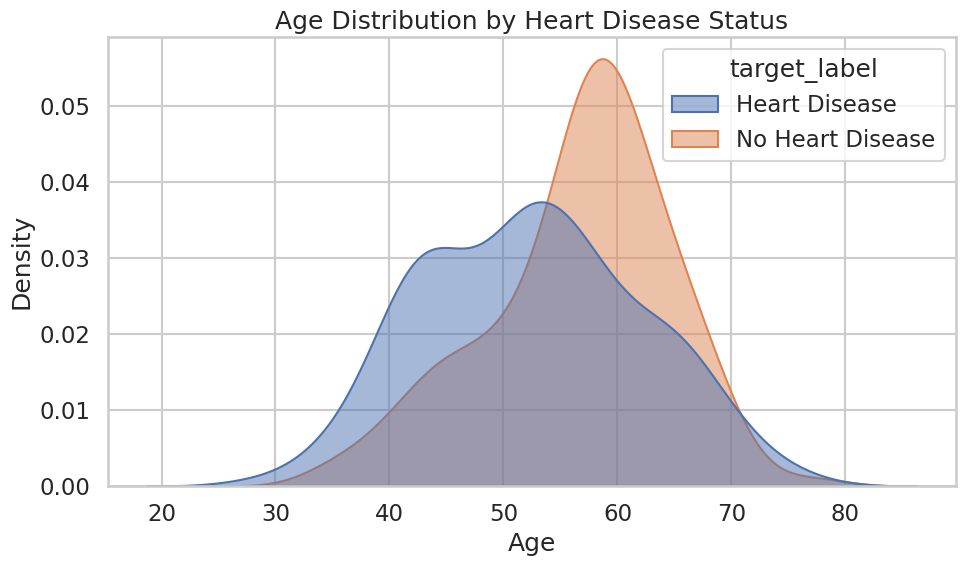

In [ ]:
# 3.1 Distribution (KDE)
plt.figure()
sns.kdeplot(data=df, x="age", hue="target_label", fill=True, common_norm=False, alpha=0.5)
plt.title("Age Distribution by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Density")
plt.tight_layout()
plt.show()


/tmp/ipython-input-346021099.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target_label", y="age", data=df, palette="Set2")


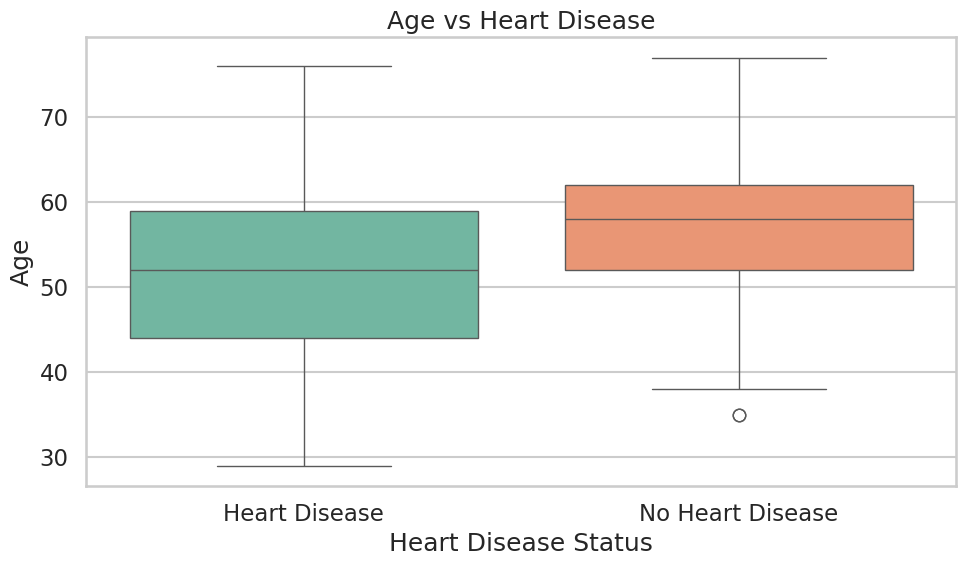

In [ ]:
# 3.2 Boxplot
plt.figure()
sns.boxplot(x="target_label", y="age", data=df, palette="Set2")
plt.title("Age vs Heart Disease")
plt.xlabel("Heart Disease Status")
plt.ylabel("Age")
plt.tight_layout()
plt.show()


4. Sex vs Heart Disease

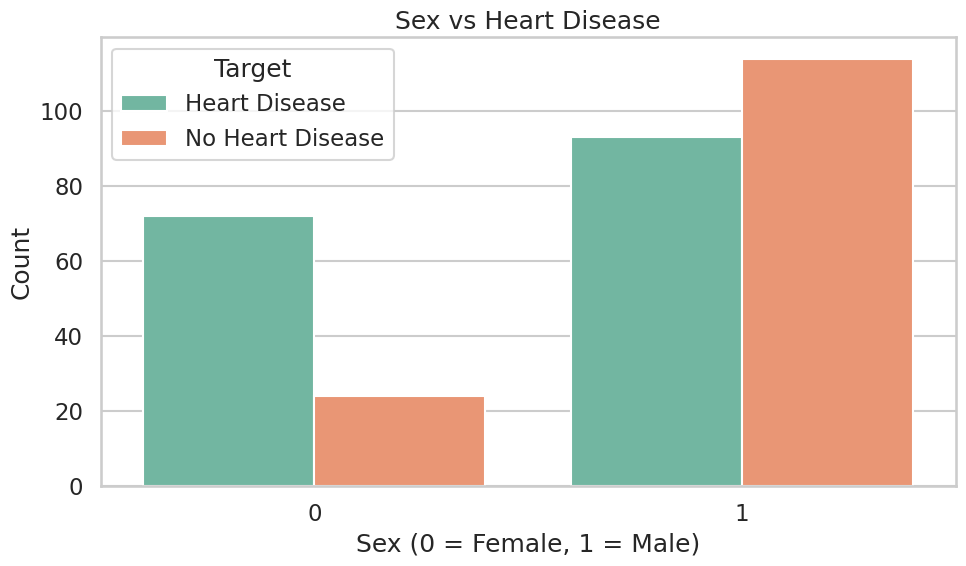

In [ ]:
plt.figure()
sns.countplot(x="sex", hue="target_label", data=df, palette="Set2")
plt.title("Sex vs Heart Disease")
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Target")
plt.tight_layout()
plt.show()


5. Chest Pain Type (cp) vs Heart Disease

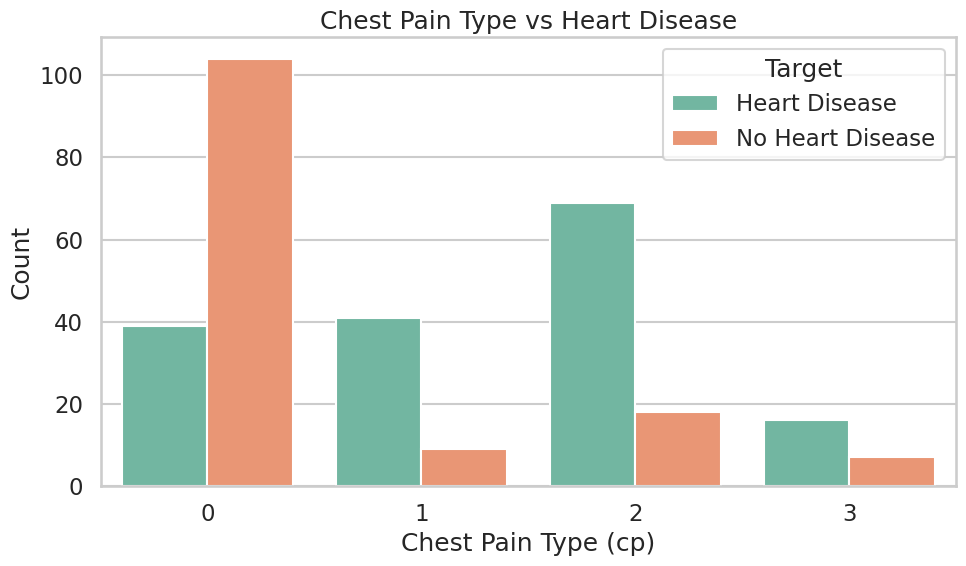

In [ ]:
plt.figure()
sns.countplot(x="cp", hue="target_label", data=df, palette="Set2")
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.legend(title="Target")
plt.tight_layout()
plt.show()


6. Resting BP & Cholesterol vs Heart Disease

/tmp/ipython-input-1829033602.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target_label", y="trestbps", data=df, palette="Set2", ax=axes[0])
/tmp/ipython-input-1829033602.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target_label", y="chol", data=df, palette="Set2", ax=axes[1])


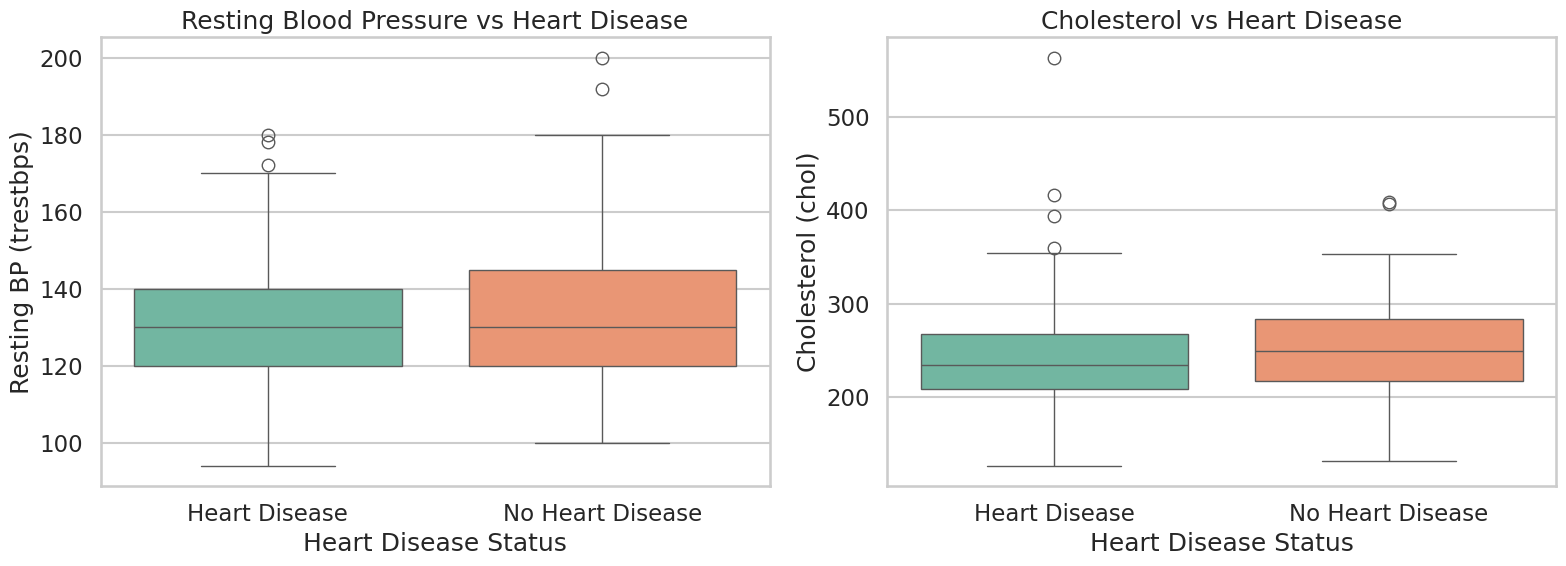

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.boxplot(x="target_label", y="trestbps", data=df, palette="Set2", ax=axes[0])
axes[0].set_title("Resting Blood Pressure vs Heart Disease")
axes[0].set_xlabel("Heart Disease Status")
axes[0].set_ylabel("Resting BP (trestbps)")

sns.boxplot(x="target_label", y="chol", data=df, palette="Set2", ax=axes[1])
axes[1].set_title("Cholesterol vs Heart Disease")
axes[1].set_xlabel("Heart Disease Status")
axes[1].set_ylabel("Cholesterol (chol)")

plt.tight_layout()
plt.show()

 7. Exercise-related features vs Heart Disease

/tmp/ipython-input-134909090.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target_label", y="thalach", data=df, palette="Set2")


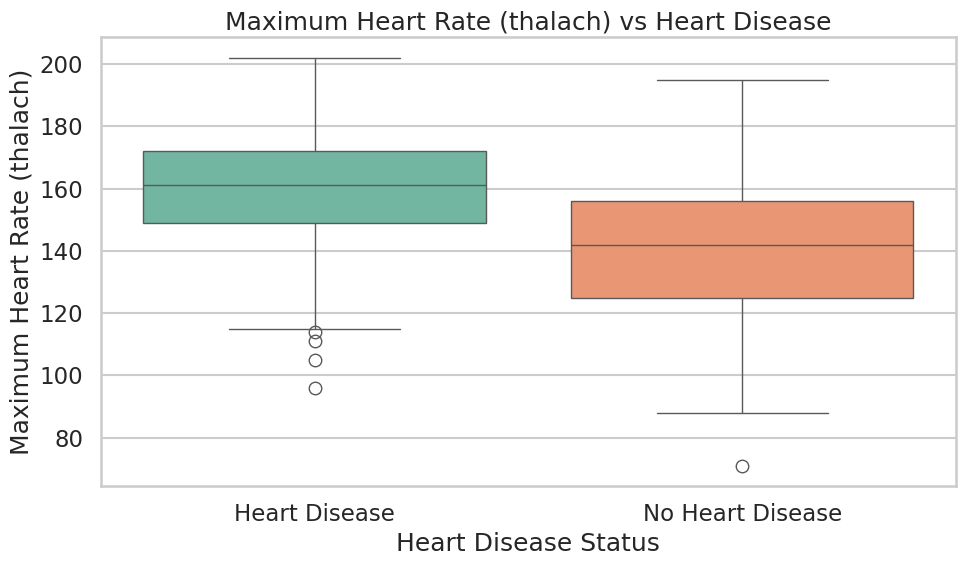

In [ ]:
# 7.1 Max heart rate (thalach)
plt.figure()
sns.boxplot(x="target_label", y="thalach", data=df, palette="Set2")
plt.title("Maximum Heart Rate (thalach) vs Heart Disease")
plt.xlabel("Heart Disease Status")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.tight_layout()
plt.show()

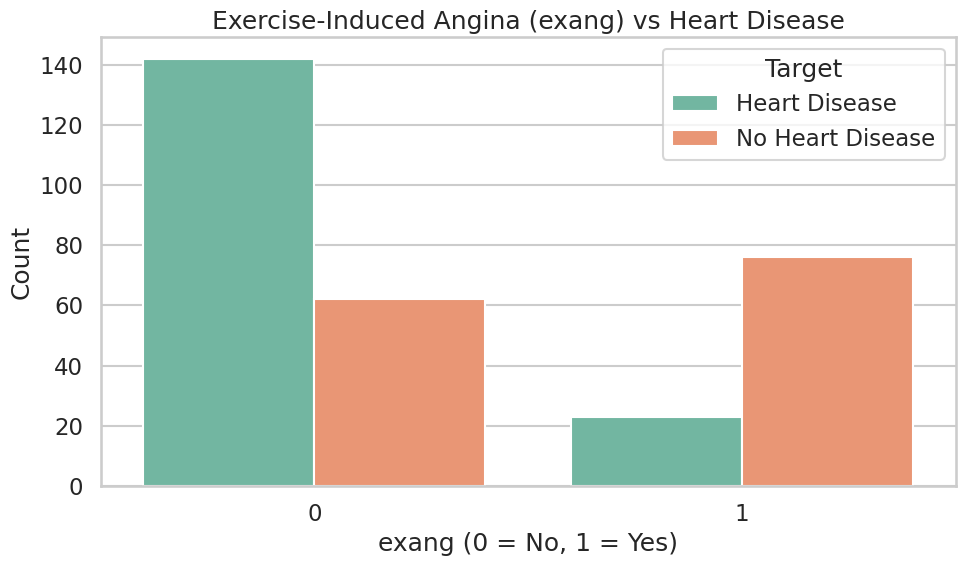

In [ ]:
# 7.2 Exercise-induced angina (exang)
plt.figure()
sns.countplot(x="exang", hue="target_label", data=df, palette="Set2")
plt.title("Exercise-Induced Angina (exang) vs Heart Disease")
plt.xlabel("exang (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Target")
plt.tight_layout()
plt.show()


/tmp/ipython-input-2930596247.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target_label", y="oldpeak", data=df, palette="Set2")


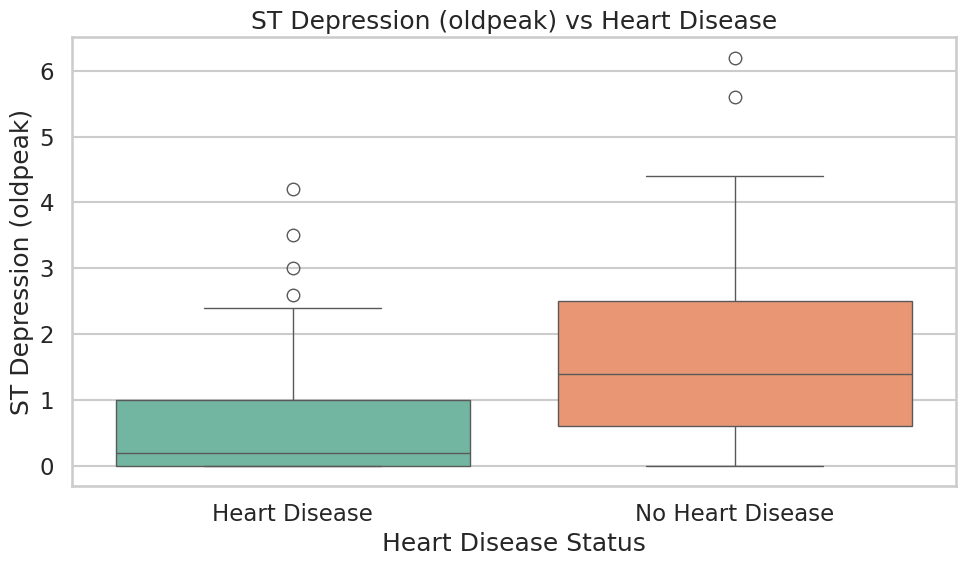

In [ ]:
# 7.3 ST depression (oldpeak)
plt.figure()
sns.boxplot(x="target_label", y="oldpeak", data=df, palette="Set2")
plt.title("ST Depression (oldpeak) vs Heart Disease")
plt.xlabel("Heart Disease Status")
plt.ylabel("ST Depression (oldpeak)")
plt.tight_layout()
plt.show()

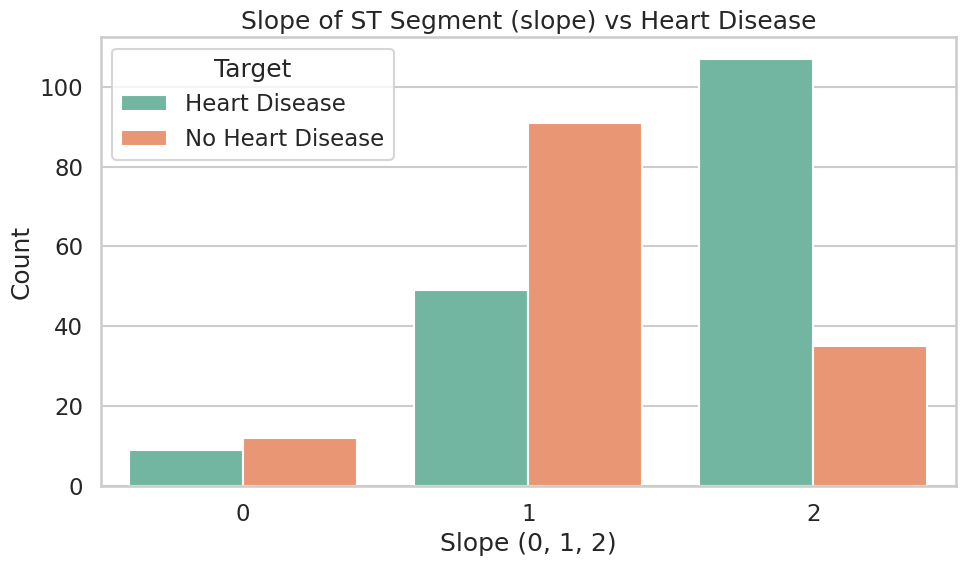

In [ ]:
# 7.4 Slope of ST segment (slope)
plt.figure()
sns.countplot(x="slope", hue="target_label", data=df, palette="Set2")
plt.title("Slope of ST Segment (slope) vs Heart Disease")
plt.xlabel("Slope (0, 1, 2)")
plt.ylabel("Count")
plt.legend(title="Target")
plt.tight_layout()
plt.show()


8. Other categorical clinical features vs Heart Disease

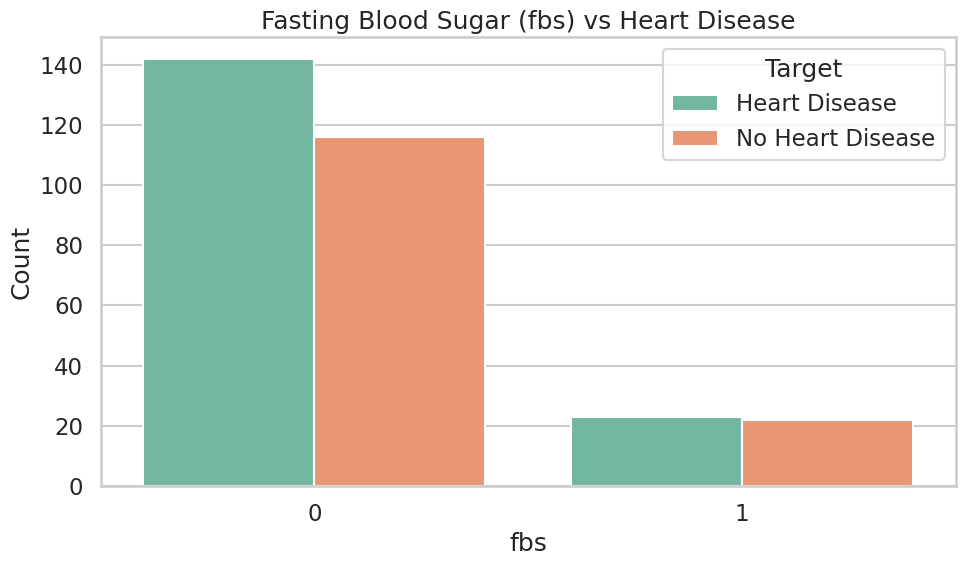

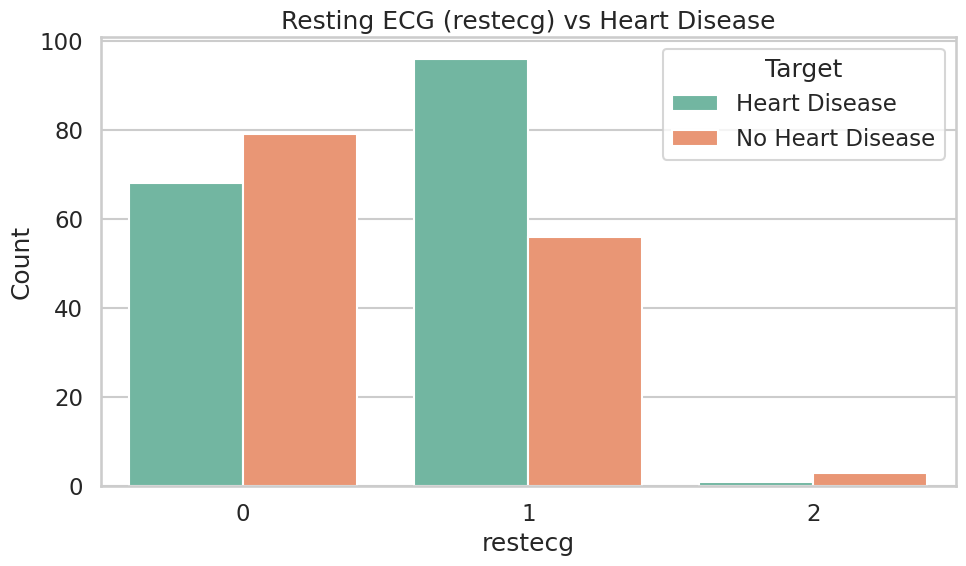

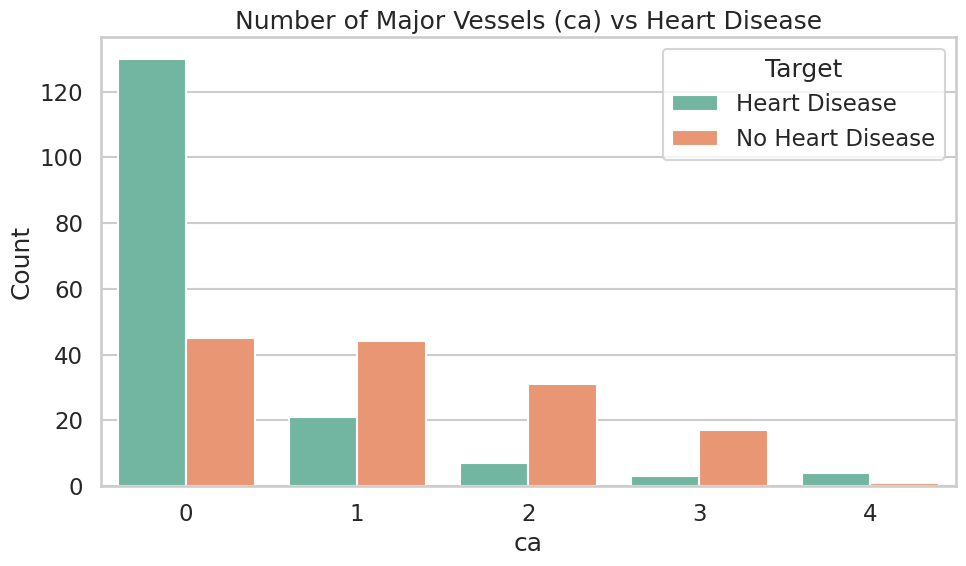

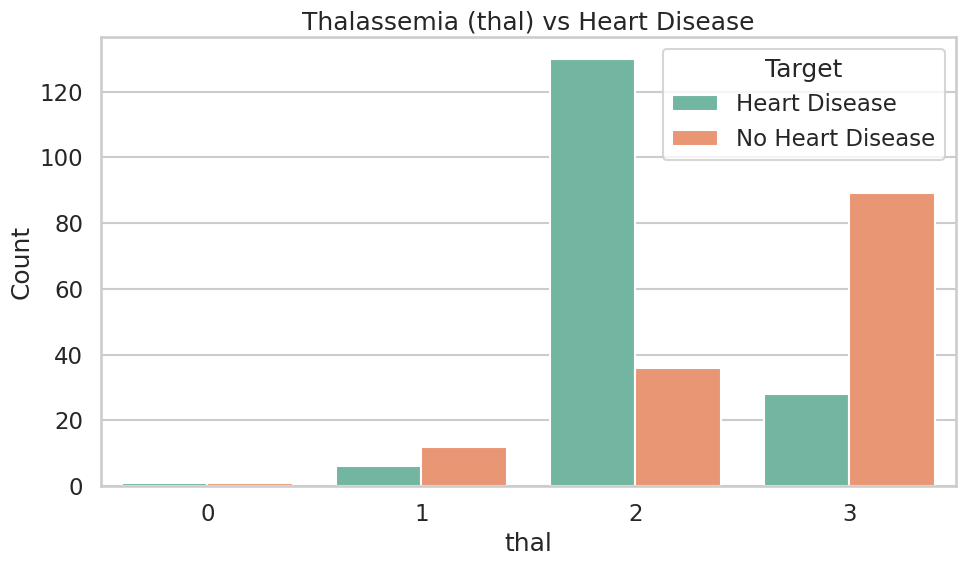

In [ ]:
categorical_cols = ["fbs", "restecg", "ca", "thal"]
titles = {
    "fbs": "Fasting Blood Sugar (fbs) vs Heart Disease",
    "restecg": "Resting ECG (restecg) vs Heart Disease",
    "ca": "Number of Major Vessels (ca) vs Heart Disease",
    "thal": "Thalassemia (thal) vs Heart Disease"
}
for col in categorical_cols:
    plt.figure()
    sns.countplot(x=col, hue="target_label", data=df, palette="Set2")
    plt.title(titles[col])
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.legend(title="Target")
    plt.tight_layout()
    plt.show()

9. Selected 2D scatter plots (bivariate)


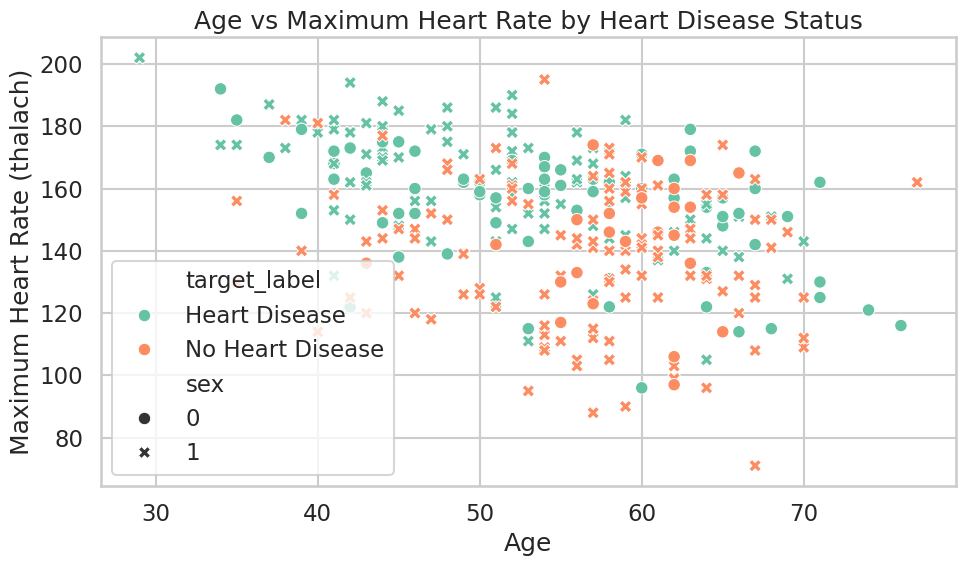

In [ ]:
# 9.1 Age vs Thalach
plt.figure()
sns.scatterplot(
    data=df,
    x="age",
    y="thalach",
    hue="target_label",
    style="sex",
    palette="Set2"
)
plt.title("Age vs Maximum Heart Rate by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.tight_layout()
plt.show()

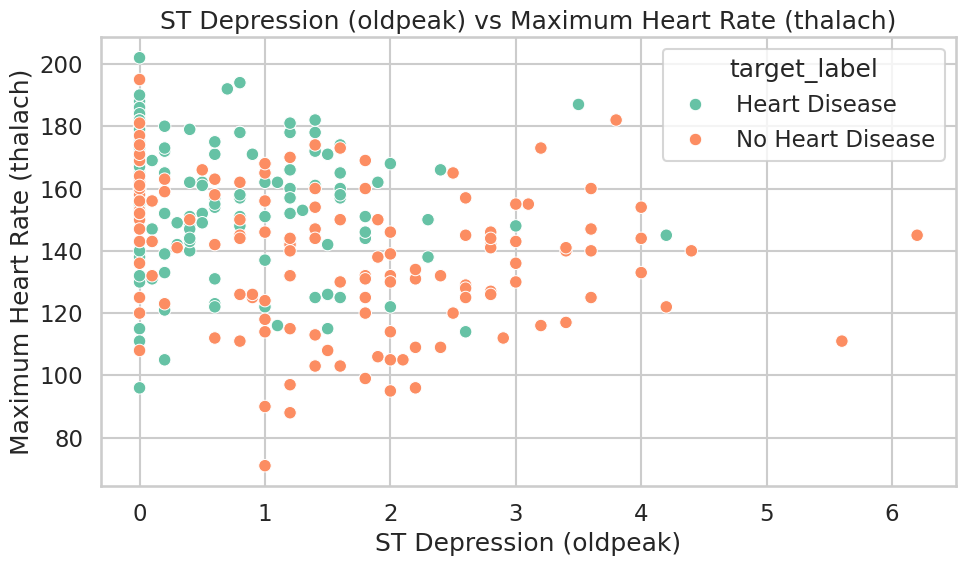

In [ ]:
# 9.2 Oldpeak vs Thalach
plt.figure()
sns.scatterplot(
    data=df,
    x="oldpeak",
    y="thalach",
    hue="target_label",
    palette="Set2"
)
plt.title("ST Depression (oldpeak) vs Maximum Heart Rate (thalach)")
plt.xlabel("ST Depression (oldpeak)")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.tight_layout()
plt.show()


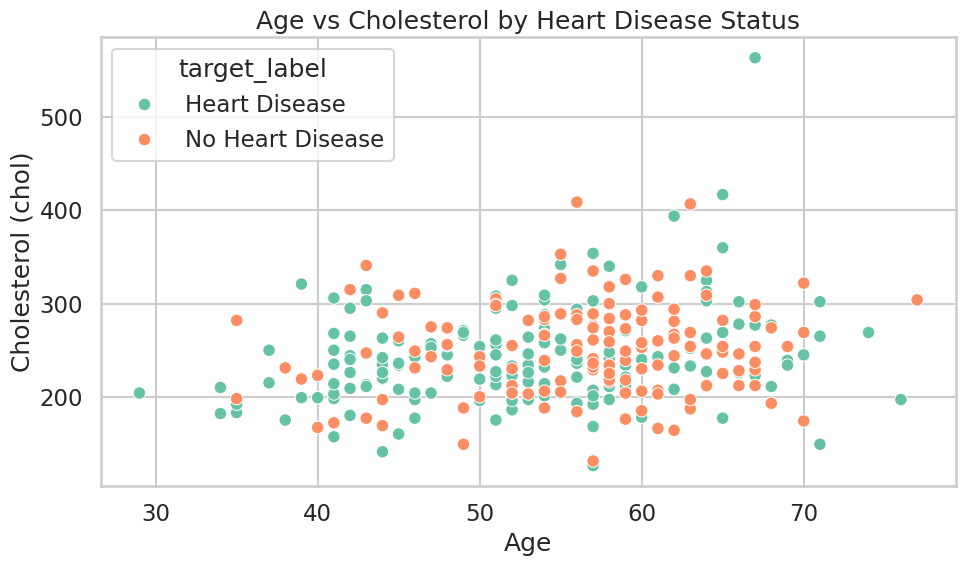

In [ ]:
# 9.3 Age vs Cholesterol
plt.figure()
sns.scatterplot(
    data=df,
    x="age",
    y="chol",
    hue="target_label",
    palette="Set2"
)
plt.title("Age vs Cholesterol by Heart Disease Status")
plt.xlabel("Age")
plt.ylabel("Cholesterol (chol)")
plt.tight_layout()
plt.show()

 10. Pairplot of key features

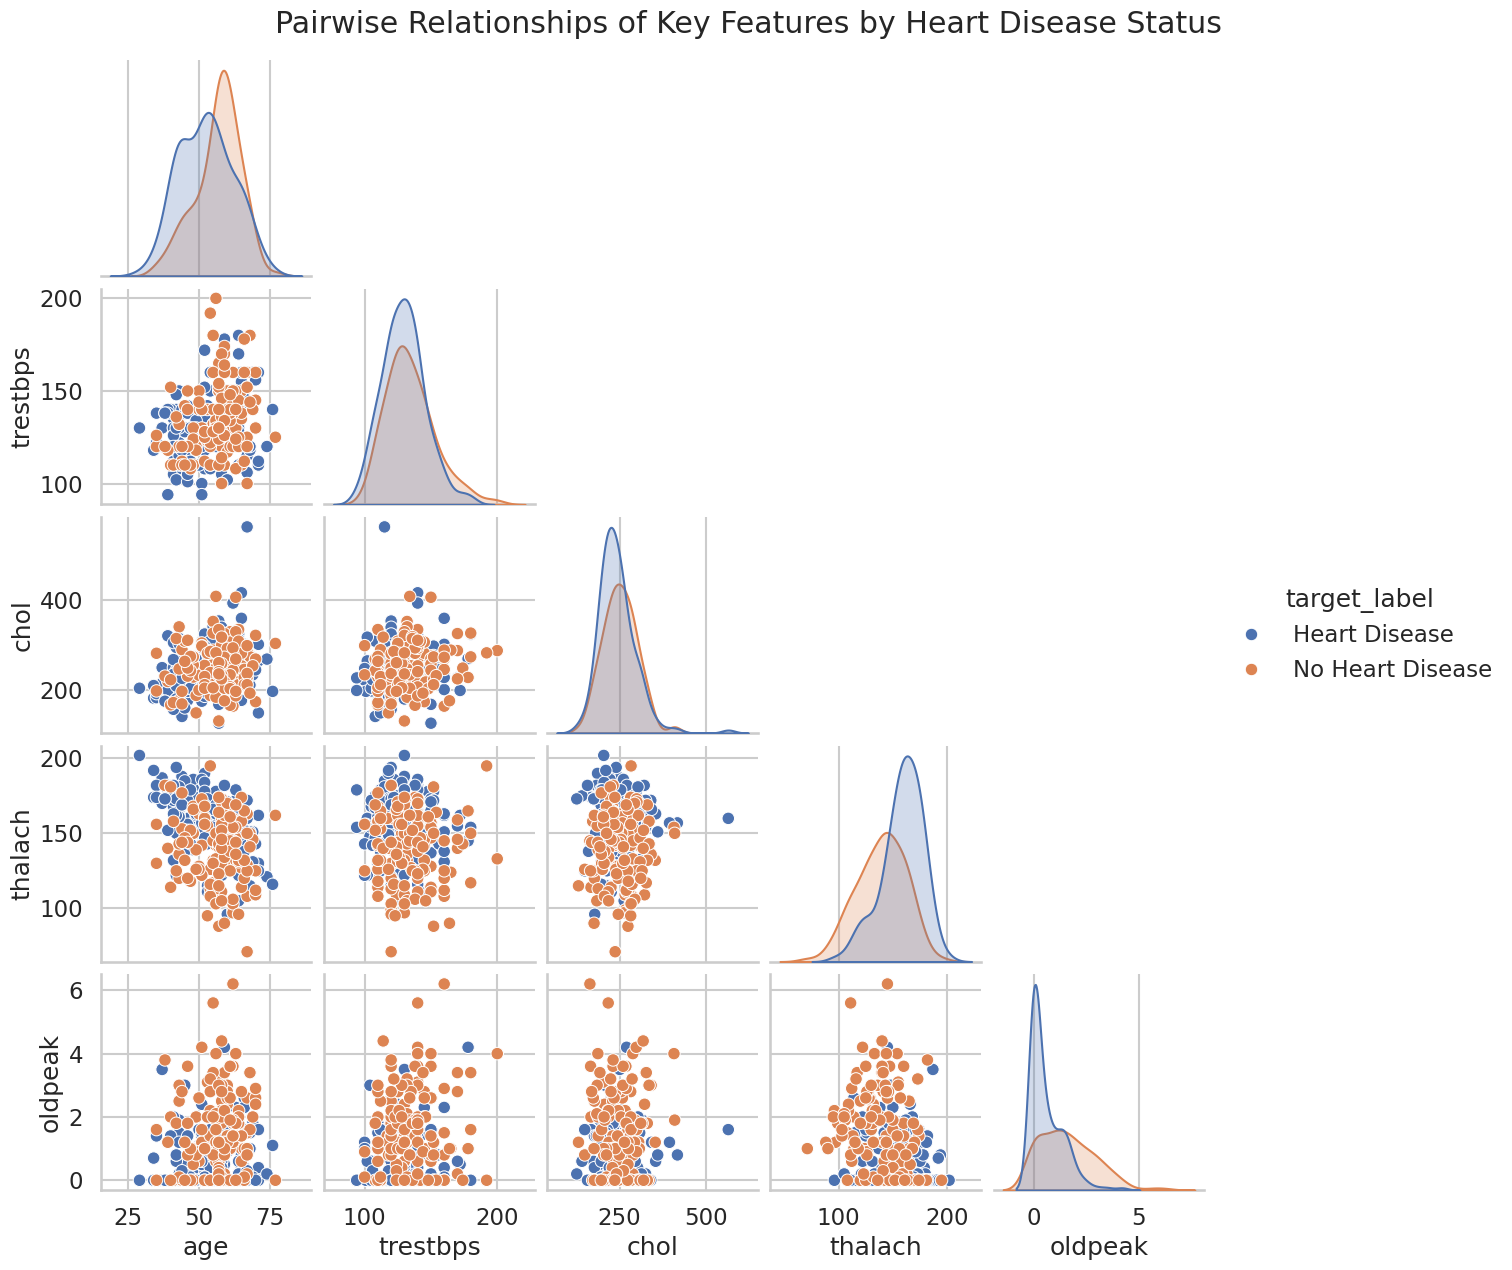

In [ ]:
key_features = ["age", "trestbps", "chol", "thalach", "oldpeak", "target_label"]
sns.pairplot(df[key_features], hue="target_label", diag_kind="kde", corner=True)
plt.suptitle("Pairwise Relationships of Key Features by Heart Disease Status", y=1.02)
plt.show()

11. Correlation Heatmap

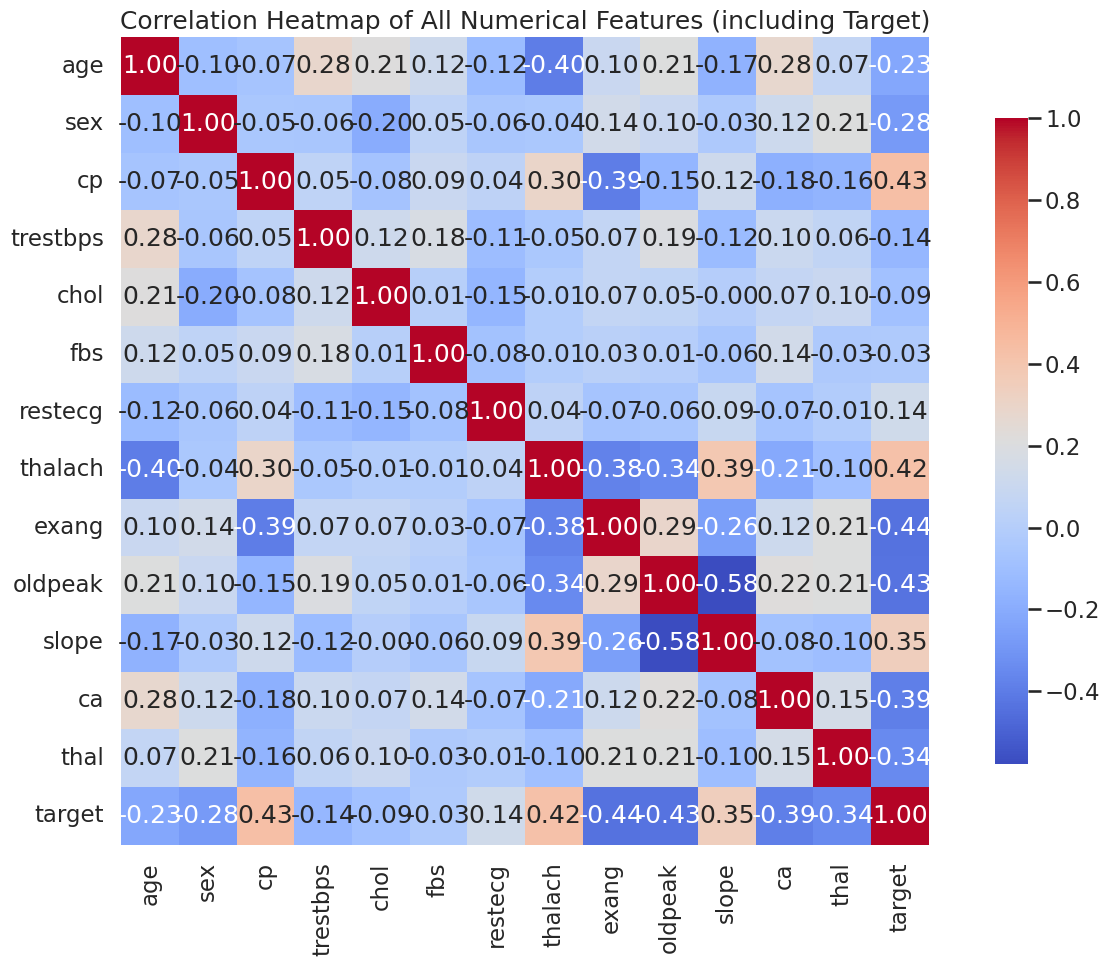

In [ ]:
# Only numeric columns for correlation
numeric_df = df.drop(columns=["target_label"])
corr = numeric_df.corr()

plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Correlation Heatmap of All Numerical Features (including Target)")
plt.tight_layout()
plt.show()